In [1]:
import pandas as pd
import numpy as np
import math


In [6]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 112 kB 45.2 MB/s 
     |████████████████████████████████| 127 kB 42.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=23849015ca2db8ca00bdea0e9f0416f04e0ef128d5e0a9d081410a12b706e41e
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=8e739667424b12aef76077c9880f724e41b177c3258c12042d5a9b19f6de5408
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=06eab0d98e63ea827220ba7aeba600499bc2f847d41817b0dd957

In [2]:
from datetime import date
from matplotlib import pyplot as plt
import datetime as dt
from matplotlib import dates

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
from yahoo_fin.stock_info import get_data

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

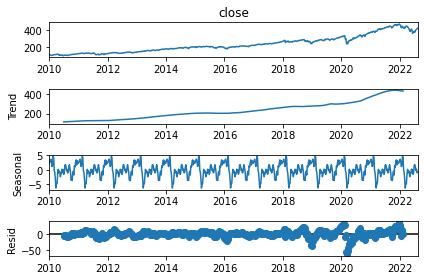

In [10]:
results = seasonal_decompose(SPY_DF['close'])
results.plot();

In [9]:
SPY_DF= get_data("SPY", start_date="01/01/2010", end_date="08/18/2022", index_as_date = True, interval="1wk")
SPY_DF

,open,high,low,close,adjclose,volume,ticker
2010-01-01,112.370003,114.330002,111.510002,114.190002,89.902496,477690000,SPY
2010-01-08,113.889999,115.139999,113.220001,114.930000,90.485107,673652800,SPY
2010-01-15,114.730003,115.129997,111.559998,111.699997,87.942101,912805600,SPY
2010-01-22,111.199997,111.739998,107.910004,108.570000,85.477829,1332016300,SPY
2010-01-29,109.040001,110.589996,106.419998,106.440002,83.800850,1244316900,SPY
...,...,...,...,...,...,...,...
2022-07-15,382.549988,398.839996,380.540009,398.790009,398.790009,357517700,SPY
2022-07-22,398.920013,406.799988,389.950012,406.070007,406.070007,335083900,SPY
2022-07-29,407.579987,415.679993,406.769989,414.170013,414.170013,333831300,SPY
2022-08-05,409.660004,424.950012,409.600006,419.989990,419.989990,283728900,SPY


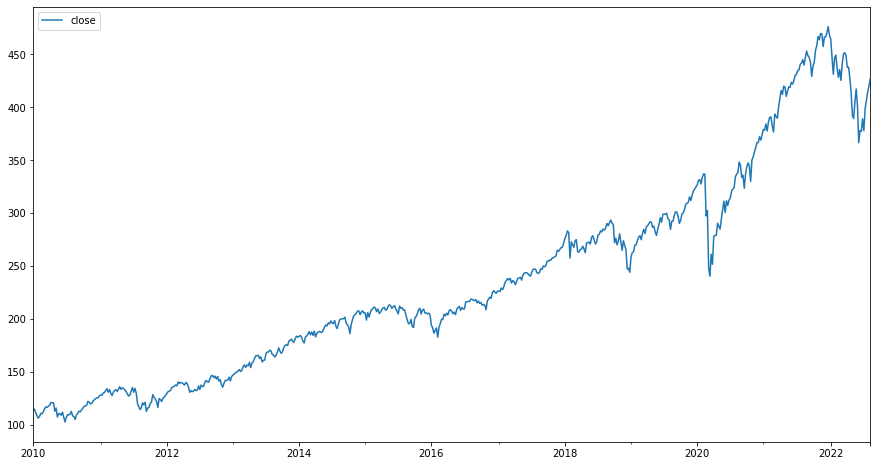

In [11]:
SPY_DF[['close',]].plot(figsize=(15,8))

In [12]:
SPY_DF.index.name = 'Date'

In [13]:
SPY_DF.isna().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

In [14]:
SPY_DF.describe()

,open,high,low,close,adjclose,volume
count,659.000000,659.000000,659.000000,659.000000,659.000000,6.590000e+02
mean,235.360167,238.692139,231.780000,235.837815,216.645579,5.748458e+08
std,96.540740,98.026113,94.874906,96.672995,103.390130,3.221762e+08
min,103.110001,107.279999,101.129997,102.760002,81.623230,1.755110e+08
25%,151.824997,154.129997,150.815002,153.214996,128.452259,3.533857e+08
50%,210.300003,212.300003,208.380005,210.809998,186.243286,4.956165e+08
75%,288.310013,292.449997,283.334991,288.824997,272.460556,6.901815e+08
max,475.640015,479.980011,472.010010,476.160004,472.643646,3.226299e+09


In [15]:
SPY_DF = SPY_DF.sort_values('Date')

In [18]:
close_prices = SPY_DF['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [19]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=4)

Epoch 1/10
468/468 [==============================] - 22s 39ms/step - loss: 0.0014
Epoch 2/10
468/468 [==============================] - 18s 37ms/step - loss: 8.5425e-04
Epoch 3/10
468/468 [==============================] - 16s 34ms/step - loss: 5.1729e-04
Epoch 4/10
468/468 [==============================] - 15s 32ms/step - loss: 3.9372e-04
Epoch 5/10
468/468 [==============================] - 17s 35ms/step - loss: 3.7798e-04
Epoch 6/10
468/468 [==============================] - 15s 33ms/step - loss: 4.2150e-04
Epoch 7/10
468/468 [==============================] - 16s 34ms/step - loss: 3.3162e-04
Epoch 8/10
468/468 [==============================] - 15s 32ms/step - loss: 2.7528e-04
Epoch 9/10
468/468 [==============================] - 15s 33ms/step - loss: 2.7523e-04
Epoch 10/10
468/468 [==============================] - 16s 34ms/step - loss: 4.0323e-04


In [22]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

17.357220016363012

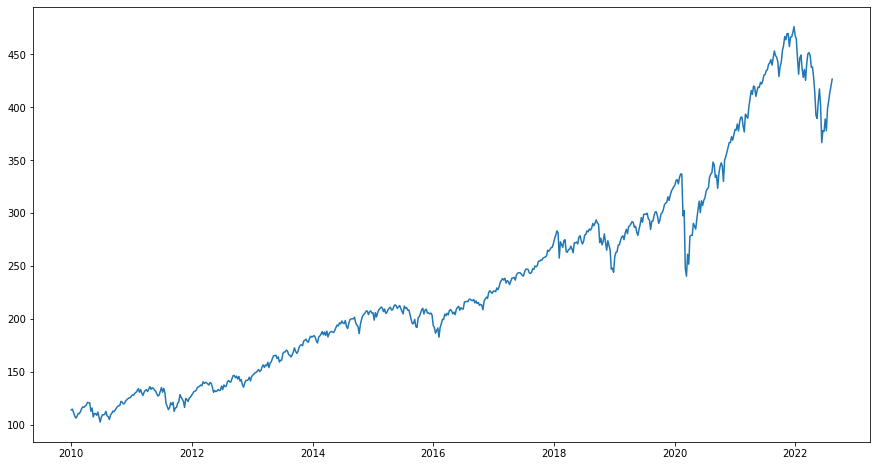

In [23]:
plt.figure(figsize=(15, 8))
plt.plot(SPY_DF['close'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


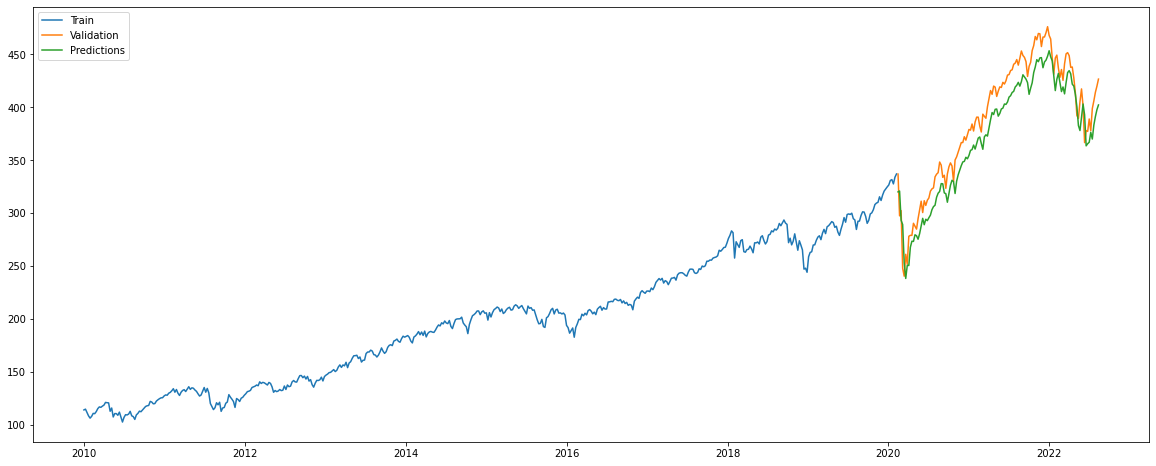

In [24]:
data = SPY_DF.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])

plt.show()